In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
%config Completer.use_jedi=False

In [3]:
data=pd.read_excel("Data_Train.xlsx")

In [4]:
pd.set_option("display.max_columns",None)

In [5]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [7]:
data['Duration'].value_counts()

2h 50m     550
1h 30m     386
2h 55m     337
2h 45m     337
2h 35m     329
          ... 
47h 40m      1
36h 25m      1
5m           1
37h 10m      1
19h 50m      1
Name: Duration, Length: 368, dtype: int64

In [8]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [9]:
data.dropna(inplace=True)

In [10]:
data.shape

(10682, 11)

In [11]:
data['Journey_day']=pd.to_datetime(data.Date_of_Journey,format="%d/%m/%Y").dt.day

In [12]:
data['Journey_day']

0        24
1         1
2         9
3        12
4         1
         ..
10678     9
10679    27
10680    27
10681     1
10682     9
Name: Journey_day, Length: 10682, dtype: int64

In [13]:
data['Journey_month']=pd.to_datetime(data.Date_of_Journey,format="%d/%m/%Y").dt.month

In [14]:
data['Journey_month']

0        3
1        5
2        6
3        5
4        3
        ..
10678    4
10679    4
10680    4
10681    3
10682    5
Name: Journey_month, Length: 10682, dtype: int64

In [15]:
data.drop(['Date_of_Journey'],inplace=True,axis=1)

In [16]:
data['Dep_hour']=pd.to_datetime(data.Dep_Time).dt.hour
data['Dep_min']=pd.to_datetime(data.Dep_Time).dt.minute

In [17]:
data.drop(['Dep_Time'],inplace=True,axis=1)

In [18]:
data.shape

(10682, 13)

In [19]:
data.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


In [20]:
data['Arrival_hour']=pd.to_datetime(data.Arrival_Time).dt.hour
data['Arrival_minute']=pd.to_datetime(data.Arrival_Time).dt.minute

In [21]:
data.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [22]:
data.drop(['Arrival_Time'],axis=1,inplace=True)

In [23]:
data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [24]:
duration=list(data['Duration'])


In [25]:
for i in range(len(duration)):
    if len(duration[i].split())!= 2:
        if "h" in duration[i]:
            duration[i]=duration[i].strip()+" 0m"
        else:
            duration[i]="0h "+duration[i]
duration_hours=[]
duration_min=[]
        

In [26]:
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep="h")[0]))
    duration_min.append(int(duration[i].split(sep="m")[0].split()[-1]))

In [27]:
data['duration_hour']=duration_hours
data['duration_min']=duration_min

In [28]:
data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_minute,duration_hour,duration_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35,4,45


In [29]:
data.drop(['Duration'],inplace=True,axis=1)

In [30]:
data['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

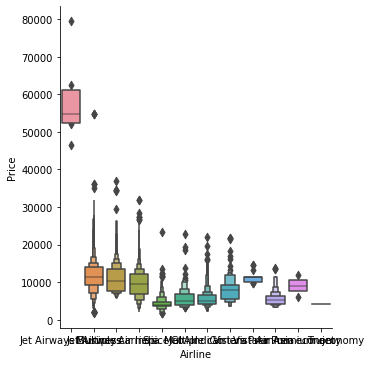

In [31]:
sns.catplot(x='Airline',y='Price',data=data.sort_values("Price",ascending=False),kind='boxen')
plt.show()

In [32]:

Airline=data['Airline']
Airline=pd.get_dummies(Airline,drop_first=True)

In [33]:
Airline.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [34]:
data['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

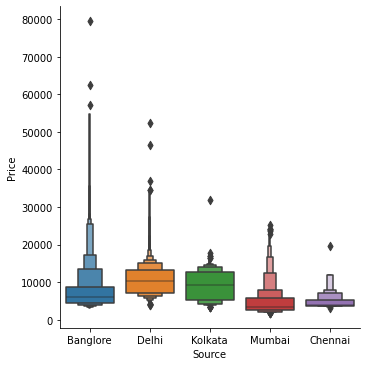

In [35]:
sns.catplot(x='Source',y='Price',data=data.sort_values("Price",ascending=False),kind='boxen')
plt.show()

In [36]:

Source=data['Source']
Source=pd.get_dummies(Source,drop_first=True)

In [37]:
Source.head()

,Chennai,Delhi,Kolkata,Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [38]:

Destination=data['Destination']
Destination=pd.get_dummies(Destination,drop_first=True)

In [39]:
Destination.head()

,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [40]:
data.drop(['Route','Additional_Info'],axis=1,inplace=True)

In [41]:
data.Total_Stops.value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_minute,duration_hour,duration_min,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,3897,24,3,22,20,1,10,2,50,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0
1,2,7662,1,5,5,50,13,15,7,25,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,4107,9,4,19,55,22,25,2,30,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10679,0,4145,27,4,20,45,23,20,2,35,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
10680,0,7229,27,4,8,20,11,20,3,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
10681,0,12648,1,3,11,30,14,10,2,40,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0


In [43]:
data=pd.concat([data,Source,Destination,Airline],axis=1)

In [44]:
data.drop(["Airline","Source","Destination"],axis=1,inplace=True)

In [47]:
data.head()

,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_minute,duration_hour,duration_min,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,non-stop,3897,24,3,22,20,1,10,2,50,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0
1,2 stops,7662,1,5,5,50,13,15,7,25,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,2 stops,13882,9,6,9,25,4,25,19,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,1 stop,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,1 stop,13302,1,3,16,50,21,35,4,45,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0


In [49]:
data=data.replace({"non-stop":0,"1 stop":1,"2 stops":2,"3 stops":3,"4 stops":4})

In [50]:
data.head()

,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_minute,duration_hour,duration_min,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,3897,24,3,22,20,1,10,2,50,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0
1,2,7662,1,5,5,50,13,15,7,25,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0


In [54]:
test_data=pd.read_excel("Test_set.xlsx")

In [55]:
test_data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info


In [56]:



test_data.dropna(inplace=True)


test_data.shape
test_data['Journey_day']=pd.to_datetime(test_data.Date_of_Journey,format="%d/%m/%Y").dt.day
test_data['Journey_day']
test_data['Journey_month']=pd.to_datetime(test_data.Date_of_Journey,format="%d/%m/%Y").dt.month
test_data['Journey_month']
test_data.drop(['Date_of_Journey'],inplace=True,axis=1)
test_data['Dep_hour']=pd.to_datetime(test_data.Dep_Time).dt.hour
test_data['Dep_min']=pd.to_datetime(test_data.Dep_Time).dt.minute
test_data.drop(['Dep_Time'],inplace=True,axis=1)
test_data.shape
test_data.head()
test_data['Arrival_hour']=pd.to_datetime(test_data.Arrival_Time).dt.hour
test_data['Arrival_minute']=pd.to_datetime(test_data.Arrival_Time).dt.minute
test_data.head()
test_data.drop(['Arrival_Time'],axis=1,inplace=True)
test_data.head()
duration=list(test_data['Duration'])
for i in range(len(duration)):
    if len(duration[i].split())!= 2:
        if "h" in duration[i]:
            duration[i]=duration[i].strip()+" 0m"
        else:
            duration[i]="0h "+duration[i]
duration_hours=[]
duration_min=[]
        
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep="h")[0]))
    duration_min.append(int(duration[i].split(sep="m")[0].split()[-1]))

test_data['duration_hour']=duration_hours
test_data['duration_min']=duration_min

test_data.head()

test_data.drop(['Duration'],inplace=True,axis=1)

test_data['Airline'].value_counts()

Airline=test_data['Airline']
Airline=pd.get_dummies(Airline,drop_first=True)

Airline.head()

test_data['Source'].value_counts()

#sns.catplot(x='Source',y='Price',test_data=test_data.sort_values("Price",ascending=False),kind='boxen')
#plt.show()

Source=test_data['Source']
Source=pd.get_dummies(Source,drop_first=True)

Source.head()

Destination=test_data['Destination']
Destination=pd.get_dummies(Destination,drop_first=True)

Destination.head()

test_data.drop(['Route','Additional_Info'],axis=1,inplace=True)

test_data.Total_Stops.value_counts()

test_data=pd.concat([test_data,Source,Destination,Airline],axis=1)

test_data.drop(["Airline","Source","Destination"],axis=1,inplace=True)


test_data.head()

test_data=test_data.replace({"non-stop":0,"1 stop":1,"2 stops":2,"3 stops":3,"4 stops":4})

test_data.head()

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_minute,duration_hour,duration_min,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Vistara,Vistara Premium economy
0,1,6,6,17,30,4,25,10,55,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,1,12,5,6,20,10,20,4,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,1,21,5,19,15,19,0,23,45,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,1,21,5,8,0,21,0,13,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,24,6,23,55,2,45,2,50,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [57]:
data.columns

Index(['Total_Stops', 'Price', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_minute', 'duration_hour',
       'duration_min', 'Chennai', 'Delhi', 'Kolkata', 'Mumbai', 'Cochin',
       'Delhi', 'Hyderabad', 'Kolkata', 'New Delhi', 'Air India', 'GoAir',
       'IndiGo', 'Jet Airways', 'Jet Airways Business', 'Multiple carriers',
       'Multiple carriers Premium economy', 'SpiceJet', 'Trujet', 'Vistara',
       'Vistara Premium economy'],
      dtype='object')

In [58]:
X=data.loc[:,['Total_Stops','Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_minute', 'duration_hour',
       'duration_min', 'Chennai', 'Delhi', 'Kolkata', 'Mumbai', 'Cochin',
       'Delhi', 'Hyderabad', 'Kolkata', 'New Delhi', 'Air India', 'GoAir',
       'IndiGo', 'Jet Airways', 'Jet Airways Business', 'Multiple carriers',
       'Multiple carriers Premium economy', 'SpiceJet', 'Trujet', 'Vistara',
       'Vistara Premium economy']]

In [59]:
X.head()

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_minute,duration_hour,duration_min,Chennai,Delhi,Delhi,Kolkata,Kolkata,Mumbai,Cochin,Delhi,Delhi,Hyderabad,Kolkata,Kolkata,New Delhi,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,24,3,22,20,1,10,2,50,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0
1,2,1,5,5,50,13,15,7,25,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
2,2,9,6,9,25,4,25,19,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,1,12,5,18,5,23,30,5,25,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
4,1,1,3,16,50,21,35,4,45,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0


In [60]:
y=data.iloc[:,1]

In [61]:
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

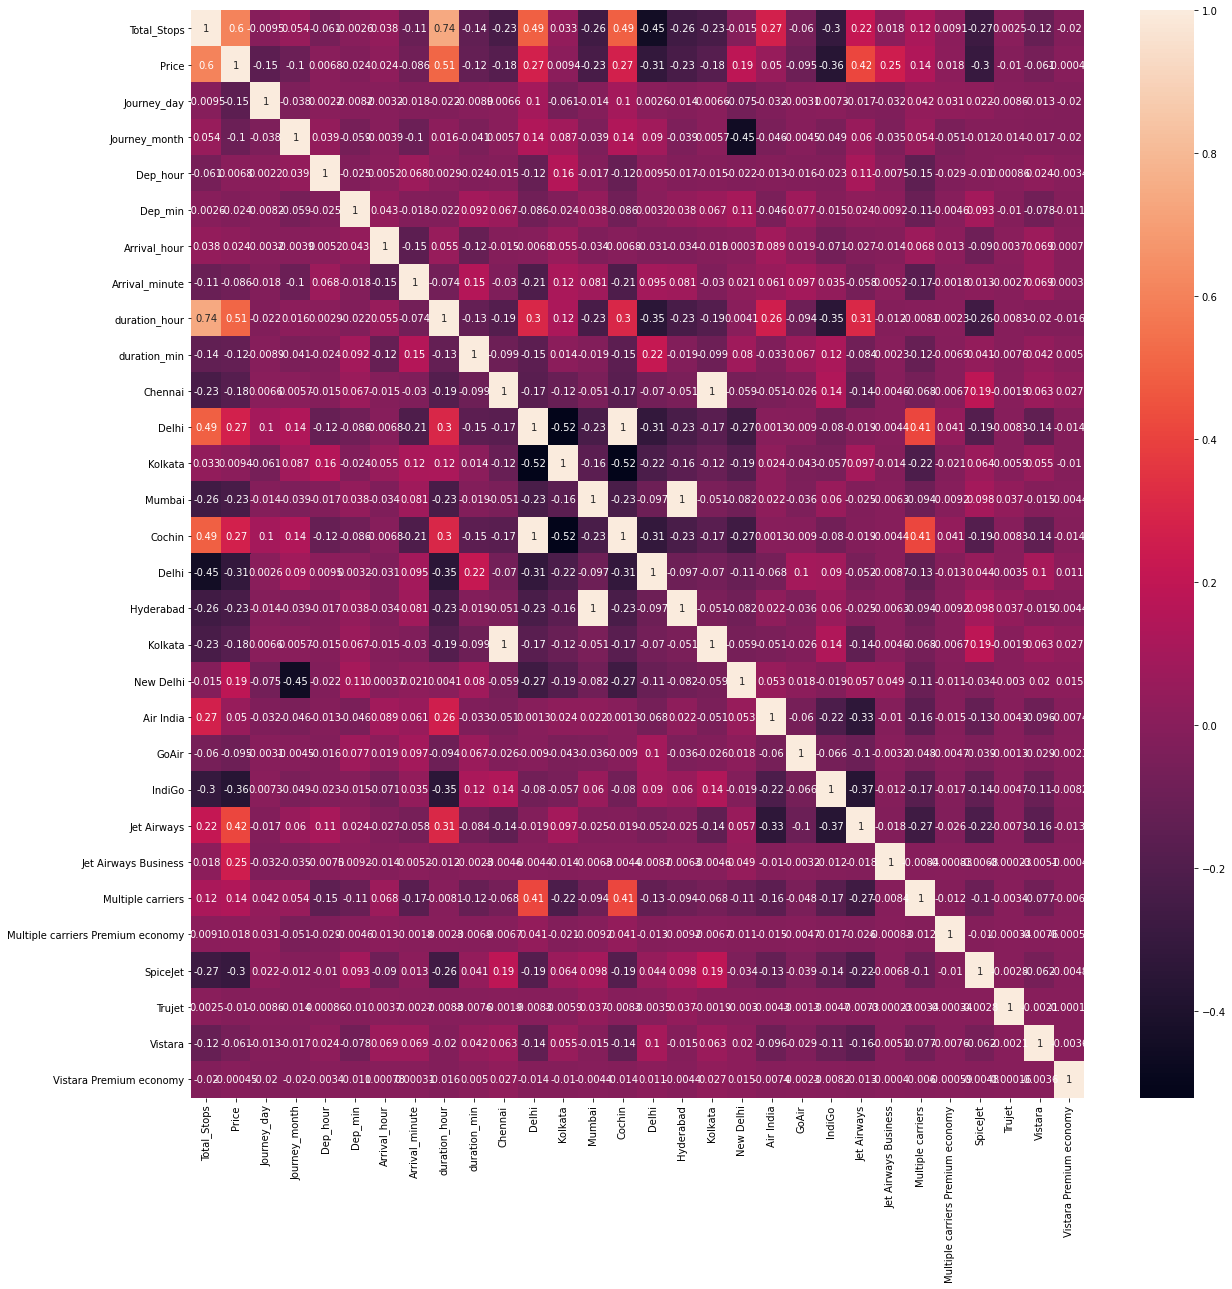

In [64]:
#Correlation
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(),annot=True)
plt.show()

In [65]:
from sklearn.ensemble import ExtraTreesRegressor
selection=ExtraTreesRegressor()
selection.fit(X,y)

ExtraTreesRegressor()

In [66]:
print(selection.feature_importances_)

[2.15481507e-01 1.44052672e-01 5.29321824e-02 2.44852652e-02
 2.12717271e-02 2.72131903e-02 1.91934536e-02 1.19669671e-01
 1.82819320e-02 2.73729233e-04 5.73076824e-03 1.13897325e-02
 1.86302226e-03 3.36974521e-04 6.92970827e-03 7.41793621e-03
 8.22393037e-03 8.30276238e-03 8.17941037e-03 1.80832502e-03
 3.17028228e-04 2.46279982e-02 1.00747698e-02 1.76131778e-03
 1.83428506e-02 1.44602627e-01 6.73908251e-02 2.03737837e-02
 8.42051877e-04 3.34079193e-03 9.85165304e-05 5.10388214e-03
 8.56565154e-05]


In [67]:
imp=pd.Series(selection.feature_importances_,index=X.columns)

<AxesSubplot:>

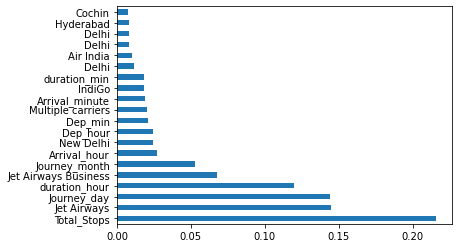

In [68]:
imp.nlargest(20).plot(kind='barh')


In [69]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=100)

In [93]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(n_estimators=700,min_samples_split= 15,min_samples_leaf= 1,max_features= 'auto',max_depth= 20)
model.fit(X_train,y_train)

RandomForestRegressor(max_depth=20, min_samples_split=15, n_estimators=700)

In [94]:
Y_pred=model.predict(X_test)

In [96]:
model.score(X_train,y_train)

0.8971522106539916

In [97]:
model.score(X_test,y_test)

0.8369740355027863

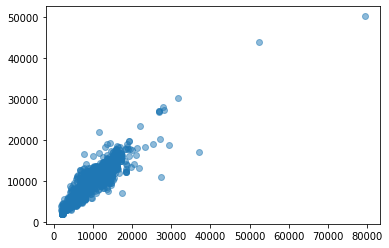

In [98]:
plt.scatter(y_test,Y_pred,alpha=0.5)

In [76]:
from sklearn import metrics

In [99]:
print("MAE:",metrics.mean_absolute_error(y_test,Y_pred))
print("MSE:",metrics.mean_squared_error(y_test,Y_pred))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test,Y_pred)))

MAE: 1165.9290017906744
MSE: 3554411.9914181465
RMSE: 1885.3148255445685


In [100]:
metrics.r2_score(y_test,Y_pred)

0.8369740355027863

In [80]:
#HyperPrameterTuning
from sklearn.model_selection import RandomizedSearchCV

In [81]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [82]:
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [84]:
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = model, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [85]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   5.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   5.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   5.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   5.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   6.2s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   9.3s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   9.1s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [86]:
rf_random.best_params_

{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [87]:
prediction = rf_random.predict(X_test)

/home/deepakdayal/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


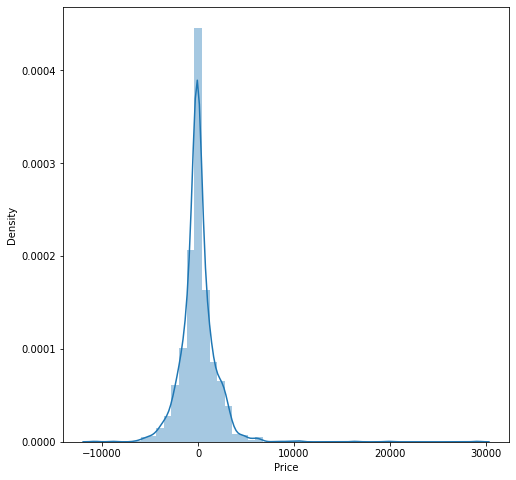

In [88]:
plt.figure(figsize = (8,8))
sns.distplot(y_test-prediction)
plt.show()

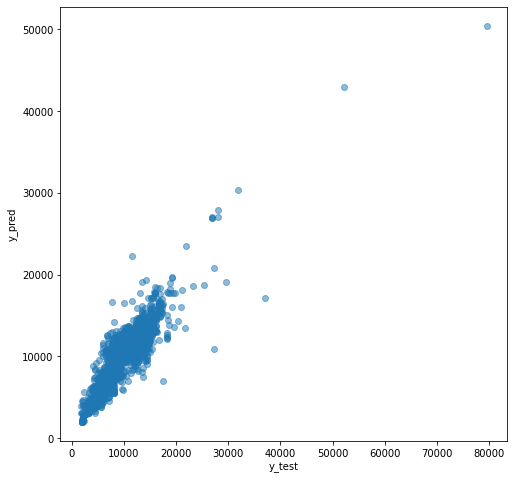

In [89]:
plt.figure(figsize = (8,8))
plt.scatter(y_test, prediction, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [90]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 1164.9548892067344
MSE: 3548095.0199769316
RMSE: 1883.6387710962342


In [108]:
##Saving Model
import pickle
# open a file, where you ant to store the data
file = open('flight_rf.pkl', 'wb')

# dump information to that file
pickle.dump(model, file)

In [112]:
model = open('flight_rf.pkl','rb')
forest = pickle.load(model)

In [104]:
os.getcwd()

<IPython.core.display.Javascript object>

'/home/deepakdayal/Desktop/DEEPAK/FlightFarePredict'

In [113]:
y_prediction = forest.predict(X_test)

In [114]:
metrics.r2_score(y_test, y_prediction)

0.8369740355027863